# DAT 301 - Assignment 5: CNN (3 of 5)
- Name: Colin Bowers (bowerc3)
- Date: Mar 20, 2024

## Experiment #2
Using a larger kernel size (5x5 instead of 3x3).

**Note**: Changes from the original notebook are shown in <font color="red">red</font>.

# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

2024-03-11 11:41:59.290677: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 11:41:59.478357: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 11:41:59.478457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 11:41:59.500173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 11:41:59.631880: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 11:41:59.634593: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### <font color="red">Use a larger kernel size (5x5)</font>

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Model Summary

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               6

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
%%time
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
  1/250 [..............................] - ETA: 5:13 - loss: 0.7067 - accuracy: 0.4688

2024-03-11 11:42:08.431515: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15745024 exceeds 10% of free system memory.
2024-03-11 11:42:08.500563: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30326400 exceeds 10% of free system memory.
2024-03-11 11:42:08.566993: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15745024 exceeds 10% of free system memory.
2024-03-11 11:42:08.580435: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 14530320 exceeds 10% of free system memory.


  2/250 [..............................] - ETA: 36s - loss: 0.7045 - accuracy: 0.5469 

2024-03-11 11:42:08.645294: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15745024 exceeds 10% of free system memory.


250/250 [==============================] - 49s 190ms/step - loss: 0.6782 - accuracy: 0.5648 - val_loss: 0.6527 - val_accuracy: 0.6235
Epoch 2/25
250/250 [==============================] - 38s 153ms/step - loss: 0.6373 - accuracy: 0.6447 - val_loss: 0.6304 - val_accuracy: 0.6605
Epoch 3/25
250/250 [==============================] - 40s 161ms/step - loss: 0.6148 - accuracy: 0.6625 - val_loss: 0.6278 - val_accuracy: 0.6550
Epoch 4/25
250/250 [==============================] - 40s 159ms/step - loss: 0.6000 - accuracy: 0.6761 - val_loss: 0.5651 - val_accuracy: 0.7070
Epoch 5/25
250/250 [==============================] - 47s 188ms/step - loss: 0.5712 - accuracy: 0.7024 - val_loss: 0.5413 - val_accuracy: 0.7325
Epoch 6/25
250/250 [==============================] - 40s 161ms/step - loss: 0.5485 - accuracy: 0.7168 - val_loss: 0.5245 - val_accuracy: 0.7510
Epoch 7/25
250/250 [==============================] - 42s 169ms/step - loss: 0.5288 - accuracy: 0.7311 - val_loss: 0.5510 - val_accuracy: 0.7

### Evaluate the Model

63/63 - 3s - loss: 0.5594 - accuracy: 0.7715 - 3s/epoch - 48ms/step


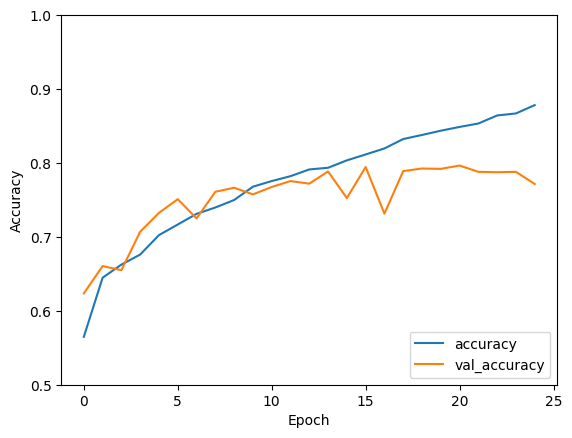

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_set, verbose=2)

In [16]:
print(f"Accuracy: {test_acc}")
print(f"    Loss: {test_loss}")

Accuracy: 0.7714999914169312
    Loss: 0.559446394443512


In [19]:
original_acc = 0.7954999804496765
delta_acc = test_acc - original_acc
print(f"Increase in Accuracy: {delta_acc}")

Increase in Accuracy: -0.02399998903274536


In [20]:
print("SUMMARY")
print(f"Accuracy (%): {round(test_acc*100, 3)}")
print(f"Increase (%): {round(delta_acc*100, 3)}")

SUMMARY
Accuracy (%): 77.15
Increase (%): -2.4
